# Predicting Loan Defaults

## Goal:

### - Discover features driving borrowers to default.
### - Build a classififcation model to predict defaults.

___

# Imports

In [1]:
import wrangle as w
import explore as e
import preprocess as p
import modeling as m

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



---

# Dictionary

| Column       | Column_type | Data_type| Description                                                                |
|--------------|-------------|----------|----------------------------------------------------------------------------|
|LoanID	       |Identifier   |string    |A unique identifier for each loan.                                          |
|Age	       |Feature      |integer	|Age of the borrower.                                                        |
|Income        |Feature      |integer   |Annual income of the borrower.                                              |
|LoanAmount    |Feature      |integer	|Amount of money being borrowed.                                             |
|CreditScore   |Feature      |integer	|Credit score of the borrower, indicating their creditworthiness.            |
|MonthsEmployed|Feature      |integer	|Number of months the borrower has been employed.                            |
|NumCreditLines|Feature      |integer	|Number of credit lines the borrower has open.                               |
|InterestRate  |Feature      |float	    |Interest rate for the loan.                                                 |
|LoanTerm      |Feature      |integer	|Term length of the loan in months.                                          |
|DTIRatio      |Feature      |float	    |Debt-to-Income ratio, borrower's debt compared to their income.             |
|Education     |Feature      |string	|Highest level of education attained by the borrower.                        |
|EmploymentType|Feature      |string	|Type of employment status of the borrower.                                  |
|MaritalStatus |Feature      |string	|Marital status of the borrower (Single, Married, Divorced).                 |
|HasMortgage   |Feature      |string	|Whether the borrower has a mortgage (Yes or No).                            |
|HasDependents |Feature      |string	|Whether the borrower has dependents (Yes or No).                            |
|LoanPurpose   |Feature      |string	|Purpose of the loan (Home, Auto, Education, Business, Other).               |
|HasCoSigner   |Feature      |string	|Whether the loan has a co-signer (Yes or No).                               |
|Default	   |Target       |integer	|Binary target variable indicating whether the loan defaulted (1) or not (0).|

---

# Acquire & Wrangle



### - Data acquired from Coursera into a csv file

### - Renamed columns & lowercased column names

### - No missing values

### - Dropped LoanID column

### - Split data 70%,15%,15%

In [2]:
# read csv and apply all preparations to dataset and split data.
train, val, test = w.wrangle_data()

train.shape, val.shape, test.shape

Found Data


((178742, 17), (38302, 17), (38303, 17))

In [3]:
train.head()

,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,dti_ratio,education,employment_type,marital_status,mortgage,dependents,loan_purpose,cosigned,default
73275,57,102745,123266,313,1,3,24.99,24,0.88,Bachelor's,Self-employed,Married,Yes,Yes,Business,No,1
214906,41,134674,19512,839,62,1,23.17,60,0.87,High School,Unemployed,Divorced,No,Yes,Auto,Yes,0
172067,22,75333,162085,806,79,4,5.03,36,0.44,High School,Unemployed,Married,No,No,Education,No,0
38482,22,20454,128754,513,21,2,6.68,36,0.67,Bachelor's,Unemployed,Divorced,Yes,No,Other,Yes,1
230713,38,54094,168473,679,31,4,12.08,60,0.76,High School,Full-time,Married,No,No,Home,Yes,0


---

# Exploration

### - Binned data for better visuals

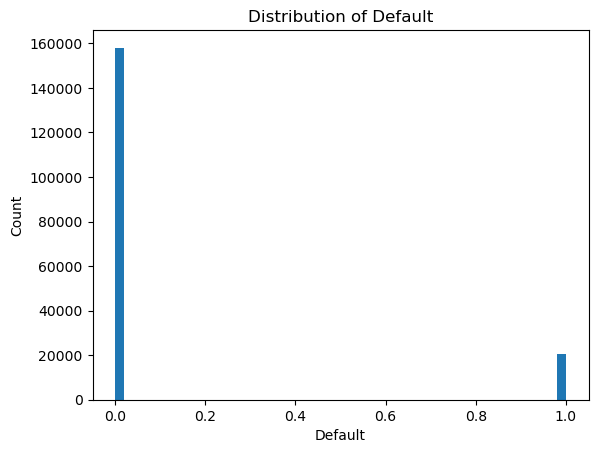

In [4]:
# Plot distribution of default
e.plt_dist(train, 'default')

In [5]:
# Make copy of train and add new binned features.
train.copy = e.bin_data(train)
val.copy = e.bin_data(val)

## 1. Is there a difference in interest rates for borrowers that default and those that did not ?

### H0: Mean of interest rates of defaults = Mean of interest rates of all borrowers

### Ha: Mean of interest rates of defaults != Mean of interest rates of all borrowers

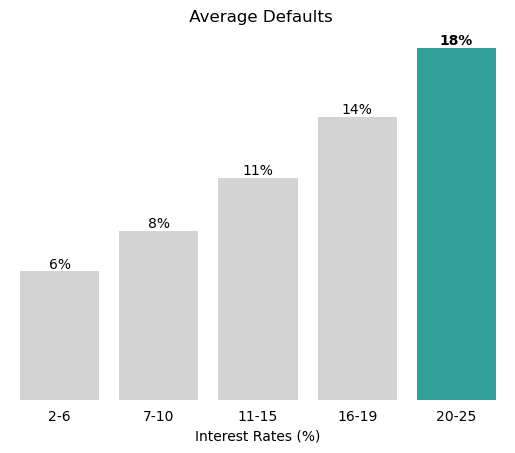

In [6]:
# Call function to visualize barplot.
e.plt_1(train.copy)

In [7]:
# 1 sample, 2 tailed t-test
e.t_test(train.copy, 'interest_rate')

a = 0.5
t = 54.29330067531287
p = 0.0

We reject the null hypothesis.


### Conclusion: 
### - Mean of interest rates of defaults != Mean of interest rates of all borrowers
### - As interest rates increase, the mean of default increases

---

## 2. Is there a difference in loan amounts for borrowers that default and those that did not ?

### H0: Mean of loan amounts of defaults = Mean of loan amount of all borrowers

### Ha: Mean of loan amounts of defaults != Mean of loan amount of all borrowers

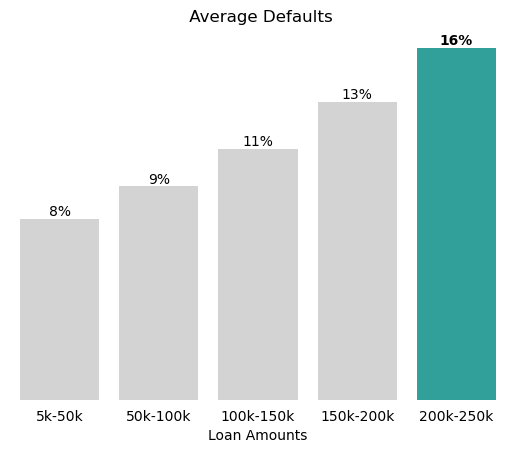

In [8]:
# Call function to visualize barplot.
e.plt_3(train.copy)

In [9]:
# 1 sample, 2 tailed t-test
e.t_test(train.copy, 'loan_amount')

a = 0.5
t = 34.59541300967391
p = 5.127603438140647e-255

We reject the null hypothesis.


### Conclusion: 

### - Mean of loan amounts of defaults != Mean of loan amount of all borrowers
### - As loan amount increase, the mean of default increases

---

## 3. Is there a difference in age for borrowers that default and those that did not ?

### H0:  Mean of age of defaults = Mean of age of all borrowers

### Ha: Mean of age of defaults != Mean of age of all borrowers

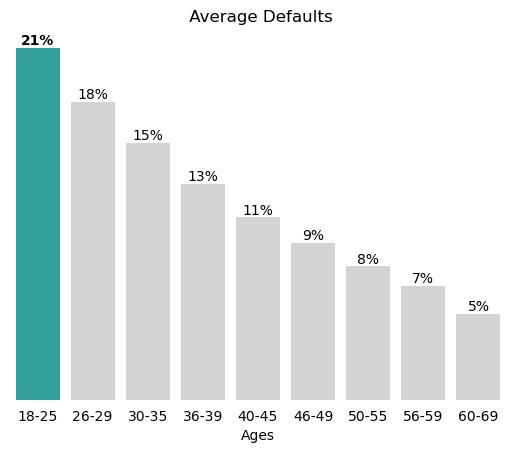

In [10]:
# Call function to visualize barplot.
e.plt_2(train.copy)

In [11]:
# 1 sample, 2 tailed t-test
e.t_test(train.copy, 'age')

a = 0.5
t = -71.84425179943742
p = 0.0

We reject the null hypothesis.


### Conclusion: 
### - Mean of age of defaults != Mean of age of all borrowers
### - As age increases, mean of default decreases

## EDA Summary:
### - Distribution of defaults significantly concentrated on non defaults (0)
### - Interest rates, loan amount, and age seem to drive borrrowers to default on loans

In [18]:
train.head()

,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,dti_ratio,education,...,loan_purpose,cosigned,default,credit_bin,age_bin,interest_bin,loan_amount_bin,income_bin,years_employed,years_employed_bin
73275,57,102745,123266,313,1,3,24.99,24,0.88,Bachelor's,...,Business,No,1,300s,56-59,20-25,100k-150k,90k-120k,0.083333,0-2
214906,41,134674,19512,839,62,1,23.17,60,0.87,High School,...,Auto,Yes,0,800s,40-45,20-25,5k-50k,120k-150k,5.166667,5-6
172067,22,75333,162085,806,79,4,5.03,36,0.44,High School,...,Education,No,0,800s,18-25,2-6,150k-200k,60k-90k,6.583333,5-6
38482,22,20454,128754,513,21,2,6.68,36,0.67,Bachelor's,...,Other,Yes,1,500s,18-25,2-6,100k-150k,15k-30k,1.750000,0-2
230713,38,54094,168473,679,31,4,12.08,60,0.76,High School,...,Home,Yes,0,600s,36-39,11-15,150k-200k,30k-60k,2.583333,0-2


<Axes: xlabel='loan_term'>

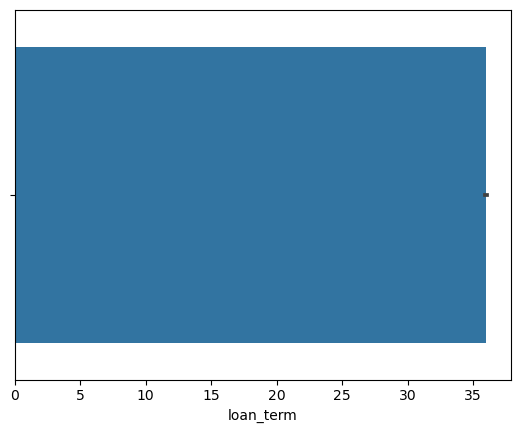

In [22]:
sns.barplot(data = train, x = 'loan_term', hue = 'age')

---

# Pre-Process

In [12]:
# Split data, scale data, get dummies
X_train, y_train = p.xy_split(train.copy)
X_val, y_val = p.xy_split(val.copy)

X_train.head()

,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,dti_ratio,years_employed,...,income_bin_15k-30k,income_bin_30k-60k,income_bin_60k-90k,income_bin_90k-120k,income_bin_120k-150k,years_employed_bin_0-2,years_employed_bin_3-4,years_employed_bin_5-6,years_employed_bin_7-8,years_employed_bin_9-10
73275,0.764706,0.649968,0.482708,0.023679,0.008403,3,0.999565,24,0.9750,0.008403,...,0,0,0,1,0,1,0,0,0,0
214906,0.450980,0.886481,0.059210,0.981785,0.521008,1,0.920435,60,0.9625,0.521008,...,0,0,0,0,1,0,0,1,0,0
172067,0.078431,0.446914,0.641157,0.921676,0.663866,4,0.131739,36,0.4250,0.663866,...,0,0,1,0,0,0,0,1,0,0
38482,0.078431,0.040400,0.505108,0.387978,0.176471,2,0.203478,36,0.7125,0.176471,...,1,0,0,0,0,1,0,0,0,0
230713,0.392157,0.289587,0.667231,0.690346,0.260504,4,0.438261,60,0.8250,0.260504,...,0,1,0,0,0,1,0,0,0,0


---

# Modeling

### - Baseline = .88
### - Evaluation metric is accuracy
### - I have moved forward with all features including new binned features

## Random Forest

In [13]:
m.r_forest(X_train, y_train, X_val, y_val)

Train Accuracy = 0.6757561177563192
Validate Accuracy = 0.6734896350060049


## Decision Tree

In [14]:
m.d_tree(X_train, y_train, X_val, y_val)

Train Accuracy = 0.6789730449474661
Validate Accuracy = 0.6757349485666545


## KNearest Neighbor

In [15]:
m.knn_m(X_train, y_train, X_val, y_val)

Train Accuracy = 0.8947309529937004
Validate Accuracy = 0.8729309174455642


---

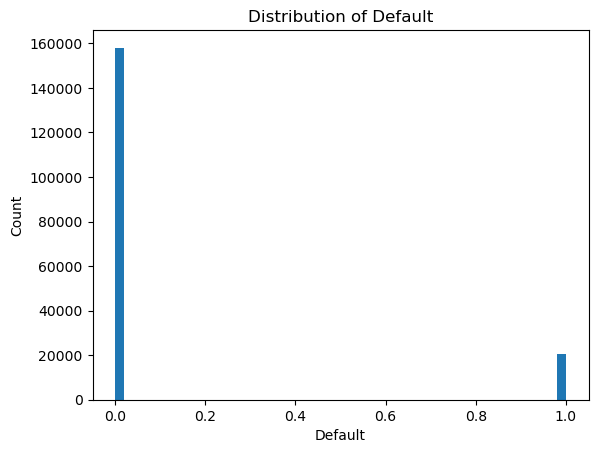

In [16]:
# Plot distribution of default
e.plt_dist(train, 'default')

# Conclusion

### - Baseline = .88
### - Decision tree and random forest models with balanced weight parameters perform worse than the baseline
### - Distribution of default binary values heavily concentrated on one value
### - Knearest tree is weighing one outcome significantly more than the other
### - Decided not to test until I improve my train and validate accuracy

---

# Next Steps:

### - Adjust model hyperparameters 
### - Do some more feature engineering
### - Investigate feature importance and minimize dimension by dropping features
### - Run test
finish


---

# Recommendations:

### - Target loan amounts lower than 150k
### - Require higher qualifications for younger population
### - Target borrowers that qualify with low interest rates